In [233]:
#rough work to debug issue with voronoi_analysis_loop() when used with new spherical Voronoi code
%load_ext autoreload
%autoreload 2
import sys; sys.path.append('/sansom/sc2/bioc1009/github_projects/spherical_Voronoi/py_sphere_Voronoi')
import voronoi_utility
import voronoi_analysis_library
import circumcircle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [234]:
universe_object = voronoi_analysis_library.produce_universe_object_on_remote_engine(data_path_1 = '/sbcb/hfs0/bioc1009/postdoc_data/production_simulations/Nov_26_2012_non_Forss_virion_prod_5us_rad_080_unrestrained_323K/',limit_1=-6,limit_2=-4,coordinate_filepath='/sbcb/hfs0/bioc1009/postdoc_data/production_simulations/July2_2012_equil_vesicle_NO_Forss/protein_incorporation/g_membed/completed_embedding_Aug14_2012/compact_sys_no_solvent.gro')

In [243]:
universe_object.trajectory.numframes

49089

In [253]:
%%time
sim37_list_frame_numbers_stage_2,sim37_list_percent_surface_area_reconstitution_from_lipids_only,sim37_list_percent_surface_area_reconstitution_from_proteins_only,sim37_list_percent_surface_area_reconstitution_from_lipids_only_inner_leaflet,sim37_list_percent_surface_area_reconstitution_from_proteins_only_inner_leaflet,sim37_dictionary_headgroup_data = voronoi_analysis_library.voronoi_analysis_loop(universe_object,34000,'full',500,PPCH_PO4_threshold=285,proteins_present='yes')

frame: 34001
frame: 34501
frame: 35001
frame: 35501
frame: 36001
frame: 36501
frame: 37001
frame: 37501
frame: 38001
frame: 38501
frame: 39001
frame: 39501


KeyboardInterrupt: 

In [251]:
import scipy as sp
import numpy as np
problem_array = np.array([[-0.97057711,  0.19725145, -0.13810121],
 [-0.97057711 ,0.19725145,-0.1381012 ],
 [-0.97231013 ,0.20174804,-0.11794381],
 [-0.96650386 ,0.22544798,-0.12265192],
 [-0.96636191 ,0.2256953 ,-0.12331375],
 [-0.96611149 ,0.22361322,-0.12894076]])
dist_matrix = sp.spatial.distance.pdist(problem_array)
dist_matrix.min()

9.9999999947364415e-09

In [237]:
sim37_list_percent_surface_area_reconstitution_from_proteins_only, sim37_list_percent_surface_area_reconstitution_from_lipids_only

([3.1928061671718257,
  2.8761636123764327,
  2.7574591850937442,
  2.6948194994056585,
  2.5131286309847871],
 [96.796263708647416,
  97.111962581077776,
  97.234681658379614,
  97.296777006501571,
  97.479133153888995])

In [4]:

%load_ext line_profiler

In [5]:
import numpy as np
prng = np.random.RandomState(117)
random_coordinate_array = voronoi_utility.generate_random_array_spherical_generators(1000,1.0,prng)
large_random_coordinate_array = voronoi_utility.generate_random_array_spherical_generators(10000,1.0,prng)
voronoi_instance = voronoi_utility.Voronoi_Sphere_Surface(random_coordinate_array, 1.0)
voronoi_instance_large = voronoi_utility.Voronoi_Sphere_Surface(large_random_coordinate_array, 1.0)

In [9]:
import scipy

In [10]:
%timeit scipy.spatial.ConvexHull(random_coordinate_array)


100 loops, best of 3: 6.71 ms per loop


In [12]:
%timeit scipy.spatial.Delaunay(random_coordinate_array)


1 loops, best of 3: 342 ms per loop


In [11]:
%timeit scipy.spatial.ConvexHull(large_random_coordinate_array)


10 loops, best of 3: 88.6 ms per loop


In [13]:
%timeit scipy.spatial.Delaunay(large_random_coordinate_array)


KeyboardInterrupt: 

In [232]:
test_dict = voronoi_instance.voronoi_region_vertices_spherical_surface()

                gen_index_vertex_1  gen_index_vertex_2  gen_index_vertex_3  \
triangle_index                                                               
0                              109                 439                 907   
1                              667                 629                 772   
2                              923                 667                 629   
3                              851                 923                 223   
4                              851                 439                 907   
5                              851                 923                 907   
6                              606                 563                 728   
7                              285                 895                 511   
8                              285                 606                 753   
9                               96                 563                 728   
10                             505                 225          

In [199]:
#%%time
#voronoi_region_vertices_spherical_surface() seems to be performing far too slowly, so see if we can optimize this (otherwise debugging the above issues will take forever)
%lprun -f voronoi_instance.voronoi_region_vertices_spherical_surface voronoi_instance.voronoi_region_vertices_spherical_surface()


In [200]:
#%%time
#voronoi_region_vertices_spherical_surface() seems to be performing far too slowly, so see if we can optimize this (otherwise debugging the above issues will take forever)
%lprun -f voronoi_instance_large.voronoi_region_vertices_spherical_surface voronoi_instance_large.voronoi_region_vertices_spherical_surface()


In [156]:
test_array = voronoi_utility.generate_random_array_spherical_generators(5000, 87.0, np.random.RandomState(556))

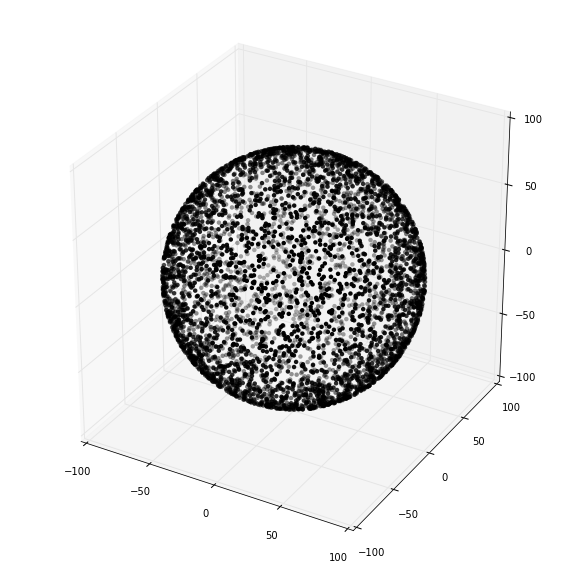

In [158]:
fig = plt.figure()
ax = fig.add_subplot('111', projection = '3d')
ax.scatter(test_array[...,0], test_array[...,1], test_array[...,2], color = 'k', edgecolor = 'none')
fig.set_size_inches(10,10)

In [159]:
test_instance = voronoi_utility.Voronoi_Sphere_Surface(test_array, 87.0)

In [160]:
dict_voronoi_vertices = test_instance.voronoi_region_vertices_spherical_surface()

In [185]:
dict_voronoi_vertices[22]

array([[-73.26866685, -39.45777689, -25.37294425],
       [-69.37267887, -42.44697215, -30.89799316],
       [-71.39332141, -38.21181372, -31.80960467],
       [-73.59543833, -38.64306232, -25.67927553]])

In [196]:
counter = 0
for generator, voronoi_vertices in dict_voronoi_vertices.iteritems():
    calculated_surface_area = voronoi_utility.calculate_surface_area_of_a_spherical_Voronoi_polygon(voronoi_vertices, 87.0)
    counter += 1
    print 'polygon number:', counter
    if counter > 5:
        break
    

 polygon number: 1
polygon number: 2
polygon number: 3
polygon number: 4
polygon number: 5
polygon number: 6
